In [3]:
import pandas as pd;
import geopandas as gp;



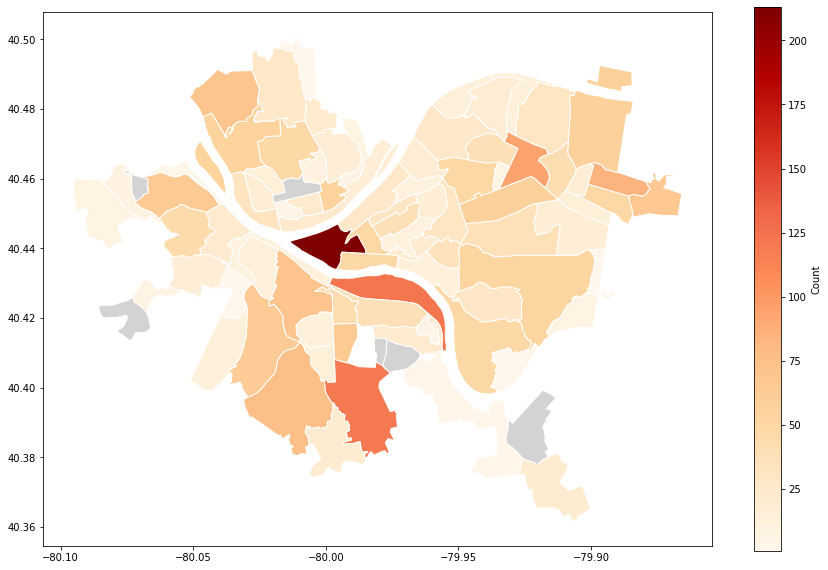

In [4]:
blotter=pd.read_csv("Blotter Data.csv")

#blotter.head()
neighborhoods = gp.read_file("data/Neighborhoods_.shp") # read in the shapefile

#neighborhoods.plot() # plot the geopandas dataframe
df2=blotter["INCIDENTNEIGHBORHOOD"].value_counts()
df3=pd.DataFrame({'NeightHood':df2.index, 'count':df2.values})
df3

map = neighborhoods.merge(df3, how='left', left_on='hood', right_on="NeightHood")
map.head()
map.plot(column="count",cmap='OrRd',edgecolor="white", legend=True,  legend_kwds={'label': "Count"},figsize=(15, 10), missing_kwds={"color": "lightgrey"}
)


In [55]:
new_df2 = sorted(df2.items(), reverse=False) #alphabetical order
del new_df2[4]
new_df2

[('Allegheny Center', 25),
 ('Allegheny West', 6),
 ('Allentown', 43),
 ('Arlington', 23),
 ('Banksville', 14),
 ('Bedford Dwellings', 30),
 ('Beechview', 63),
 ('Beltzhoover', 14),
 ('Bloomfield', 50),
 ('Bluff', 49),
 ('Bon Air', 16),
 ('Brighton Heights', 70),
 ('Brookline', 77),
 ('California-Kirkbride', 16),
 ('Carrick', 120),
 ('Central Business District', 213),
 ('Central Lawrenceville', 27),
 ('Central North Side', 29),
 ('Central Oakland', 36),
 ('Chateau', 34),
 ('Crafton Heights', 45),
 ('Crawford-Roberts', 50),
 ('Duquesne Heights', 14),
 ('East Allegheny', 56),
 ('East Hills', 67),
 ('East Liberty', 94),
 ('Elliott', 23),
 ('Esplen', 3),
 ('Fairywood', 7),
 ('Fineview', 10),
 ('Friendship', 8),
 ('Garfield', 38),
 ('Glen Hazel', 2),
 ('Greenfield', 29),
 ('Hays', 4),
 ('Hazelwood', 49),
 ('Highland Park', 30),
 ('Homewood North', 85),
 ('Homewood South', 50),
 ('Homewood West', 18),
 ('Knoxville', 64),
 ('Larimer', 41),
 ('Lincoln Place', 21),
 ('Lincoln-Lemington-Belmar',

In [54]:
#Crime rate
population=pd.read_csv("population.csv")

list_population=[]
for line in open('./population.csv','r',encoding='utf-8'):
    list_population.append(line.strip())
del list_population[0]
list_population
#crimerate = list(map(lambda x: x[0]/x[1], zip(list_population, new_df2)))
#print (crimerate)
#crimerate = [a / b for a, b in zip(list_population, new_df2)]
#print (crimerate)


['Allegheny Center,1419',
 'Allegheny West,540',
 'Allentown,2305',
 'Arlington - Arlington Heights (Combined),2040',
 'Banksville,4127',
 'Bedford Dwellings,1386',
 'Beechview,7596',
 'Beltzhoover,1604',
 'Bloomfield,8665',
 'Bluff,5882',
 'Bon Air,759',
 'Brighton Heights,7105',
 'Brookline,13063',
 'California-Kirkbride,709',
 'Carrick,10290',
 'Central Business District (Downtown),5477',
 'Central Lawrenceville,4720',
 'Central Northside,2972',
 'Central Oakland,5835',
 'Chartiers City,492',
 'Chateau,19',
 'Crafton Heights,3999',
 'Crawford-Roberts,2293',
 'Duquesne Heights,2397',
 'East Allegheny,1903',
 'East Carnegie,491',
 'East Hills,2892',
 'East Liberty,6187',
 'Elliott,2193',
 'Esplen,322',
 'Fairywood,1092',
 'Fineview,1140',
 'Friendship,1963',
 'Garfield,3643',
 'Glen Hazel,659',
 'Greenfield,7261',
 'Hays,321',
 'Hazelwood,3889',
 'Highland Park,6235',
 'Homewood North,2617',
 'Homewood South,2260',
 'Homewood West,642',
 'Knoxville,3493',
 'Larimer,1545',
 'Lincoln Pl

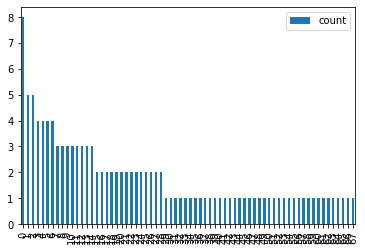

In [65]:
playground=pd.read_csv("Playgrounds.csv")
pg_neighborhoods = gp.read_file("data/Neighborhoods_.shp") 
playgrounds=playground["neighborhood"].value_counts()
pgcounts=pd.DataFrame({'NeightHood':playgrounds.index, 'count':playgrounds.values})
#pgcounts.plot()
pgcounts.plot(kind="bar")